### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

In [4]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep="\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [24]:
df = df.drop_duplicates()
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3
...,...,...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",4,1
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,0,4
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,1,2
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,3,1


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 2202 to 2748
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3076 non-null   object
 1   rating             3076 non-null   int64 
 2   effectiveness      3076 non-null   object
 3   sideEffects        3076 non-null   object
 4   condition          3075 non-null   object
 5   benefitsReview     3076 non-null   object
 6   sideEffectsReview  3074 non-null   object
 7   commentsReview     3068 non-null   object
 8   effectiveness_int  3076 non-null   int64 
 9   sideEffects_int    3076 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 264.3+ KB


In [26]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
count,3076,3076.000000,3076,3076,3075,3076,3074,3068,3076.000000,3076.000000
unique,502,NaN,5,5,1426,3032,2814,3047,NaN,NaN
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none,NaN,NaN
freq,60,NaN,1317,1007,229,20,112,6,NaN,NaN
mean,NaN,6.998375,NaN,NaN,NaN,NaN,NaN,NaN,2.934005,1.308843
std,NaN,2.944859,NaN,NaN,NaN,NaN,NaN,NaN,1.232567,1.179307
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,2.000000


In [27]:
df['effectiveness'].value_counts()

Highly Effective          1317
Considerably Effective     916
Moderately Effective       413
Ineffective                247
Marginally Effective       183
Name: effectiveness, dtype: int64

In [28]:
df['sideEffects'].value_counts()

Mild Side Effects                1007
No Side Effects                   918
Moderate Side Effects             609
Severe Side Effects               367
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

In [29]:
df['condition'].value_counts()

depression                                          229
acne                                                164
anxiety                                              63
insomnia                                             54
birth control                                        49
                                                   ... 
all over and various type pain                        1
excessive coughing, later diagnosed as pneumonia      1
after birth thyroid not working to mormal levelc      1
chest infection (viral)                               1
total hysterctomy                                     1
Name: condition, Length: 1426, dtype: int64

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [30]:
pd.get_dummies(df['effectiveness'])

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
2202,0,1,0,0,0
3117,0,1,0,0,0
1146,0,1,0,0,0
3947,0,0,0,1,0
1951,0,0,0,1,0
...,...,...,...,...,...
1039,0,1,0,0,0
3281,0,0,1,0,0
1664,0,0,0,1,0
2621,1,0,0,0,0


In [31]:
my_effectiveness = {
    "Ineffective": 0,
    "Marginally Effective": 1,
    "Moderately Effective": 2,
    "Considerably Effective": 3,
    "Highly Effective": 4}

df['effectiveness_int'] = df['effectiveness'].map(my_effectiveness)
df

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_12964\1426571430.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['effectiveness_int'] = df['effectiveness'].map(my_effectiveness)


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3
...,...,...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",4,1
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,0,4
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,1,2
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,3,1


In [32]:
my_effectiveness = {
    "No Side Effects": 0,
    "Mild Side Effects": 1,
    "Moderate Side Effects": 2,
    "Severe Side Effects": 3,
    "Extremely Severe Side Effects": 4}

df['sideEffects_int'] = df['sideEffects'].map(my_effectiveness)
df

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_12964\2134053563.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sideEffects_int'] = df['sideEffects'].map(my_effectiveness)


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3
...,...,...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",4,1
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,0,4
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,1,2
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,3,1


In [33]:
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3


In [36]:
X = df[['rating', "effectiveness_int", "sideEffects_int"]]
print(X.shape)

(3076, 3)


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

#### Genera el K Means 

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
model = KMeans(n_init=10)
model.fit(X )
model.predict(X)

array([5, 6, 7, ..., 2, 0, 5])

In [45]:
model.score(X)

-3451.6523126940983

In [46]:
silhouette_score(X, model.predict(X))

0.3570535473153485

In [48]:
km_list = [KMeans(n_clusters=k, n_init=10).fit(X) for k in range(2,30)]
km_list

[KMeans(n_clusters=2, n_init=10),
 KMeans(n_clusters=3, n_init=10),
 KMeans(n_clusters=4, n_init=10),
 KMeans(n_clusters=5, n_init=10),
 KMeans(n_clusters=6, n_init=10),
 KMeans(n_clusters=7, n_init=10),
 KMeans(n_init=10),
 KMeans(n_clusters=9, n_init=10),
 KMeans(n_clusters=10, n_init=10),
 KMeans(n_clusters=11, n_init=10),
 KMeans(n_clusters=12, n_init=10),
 KMeans(n_clusters=13, n_init=10),
 KMeans(n_clusters=14, n_init=10),
 KMeans(n_clusters=15, n_init=10),
 KMeans(n_clusters=16, n_init=10),
 KMeans(n_clusters=17, n_init=10),
 KMeans(n_clusters=18, n_init=10),
 KMeans(n_clusters=19, n_init=10),
 KMeans(n_clusters=20, n_init=10),
 KMeans(n_clusters=21, n_init=10),
 KMeans(n_clusters=22, n_init=10),
 KMeans(n_clusters=23, n_init=10),
 KMeans(n_clusters=24, n_init=10),
 KMeans(n_clusters=25, n_init=10),
 KMeans(n_clusters=26, n_init=10),
 KMeans(n_clusters=27, n_init=10),
 KMeans(n_clusters=28, n_init=10),
 KMeans(n_clusters=29, n_init=10)]

In [51]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in km_list]
silhouette_score_list

[0.6202329963099731,
 0.4541698281460479,
 0.41635006064519514,
 0.41493000747805475,
 0.40802663953006885,
 0.40132941395990424,
 0.39197840622456753,
 0.38905768906052357,
 0.39489126590415036,
 0.4195766152841558,
 0.4273709674342833,
 0.43270808274493494,
 0.46080081419544583,
 0.4689323092381603,
 0.48277092176037123,
 0.4875553329288584,
 0.4862988526160179,
 0.5181472039459502,
 0.49549757427325797,
 0.5299422344165736,
 0.5461928103450654,
 0.574209893083072,
 0.560726557318682,
 0.5667048637843894,
 0.5965776706971119,
 0.603253048216298,
 0.5754152797214086,
 0.6249509660911259]

Text(0, 0.5, 'silhouette_score')

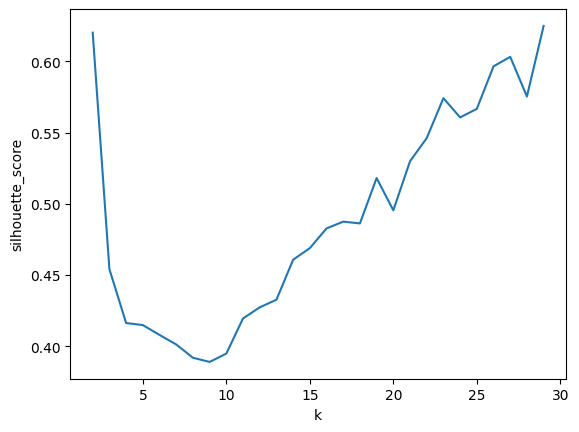

In [52]:
plt.plot(range(2,30), silhouette_score_list)
plt.xlabel("k")
plt.ylabel("silhouette_score")

Text(0, 0.5, 'Inertia')

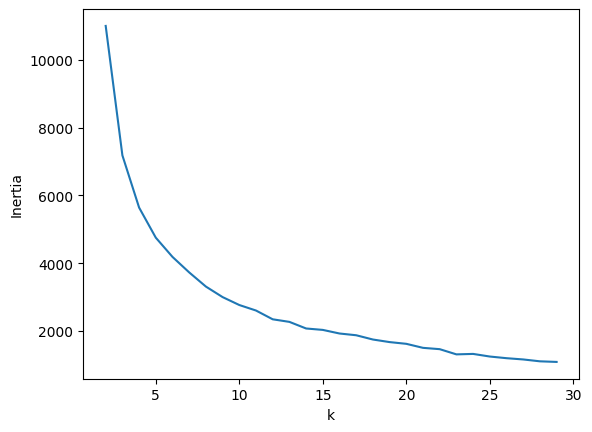

In [53]:
inertias = [model.inertia_ for model in km_list]
plt.plot(range(2,30), inertias)
plt.xlabel("k")
plt.ylabel("Inertia")

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [80]:
kmeans = KMeans(n_clusters=2, n_init=10).fit(X)
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

In [81]:
df_cluster = X.copy()
df_cluster['cluster'] = kmeans.labels_
df_cluster

,rating,effectiveness_int,sideEffects_int,cluster
2202,4,4,1,1
3117,1,4,3,1
1146,10,4,0,0
3947,3,1,1,1
1951,2,1,3,1
...,...,...,...,...
1039,10,4,1,0
3281,1,0,4,1
1664,2,1,2,1
2621,8,3,1,0


In [82]:
df_cluster['cluster'].value_counts()

0    2257
1     819
Name: cluster, dtype: int64

<Axes: ylabel='cluster'>

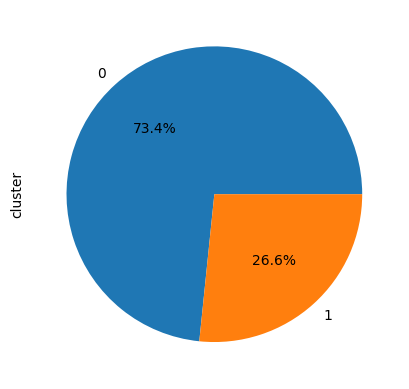

In [83]:
df_cluster['cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [84]:
pd.set_option("display.max_columns", 100)

In [85]:
df_cluster.groupby('cluster').describe()

rating                                                 \
          count      mean       std  min  25%  50%   75%   max   
cluster                                                          
0        2257.0  8.573327  1.268151  5.0  8.0  9.0  10.0  10.0   
1         819.0  2.658120  1.568436  1.0  1.0  3.0   4.0   6.0   

        effectiveness_int                                               \
                    count      mean       std  min  25%  50%  75%  max   
cluster                                                                  
0                  2257.0  3.424457  0.705654  1.0  3.0  4.0  4.0  4.0   
1                   819.0  1.582418  1.358297  0.0  0.0  1.0  3.0  4.0   

        sideEffects_int                                               
                  count      mean       std  min  25%  50%  75%  max  
cluster                                                               
0                2257.0  0.882144  0.839688  0.0  0.0  1.0  1.0  4.0  
1                 819.0  2.484737  1.181851  0.0  2.0  3.0  3.0  4.0

In [86]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df_cluster, x='rating', y='effectiveness_int', z='sideEffects_int',
              color='cluster')
fig.show()